Accuracy: 0.99


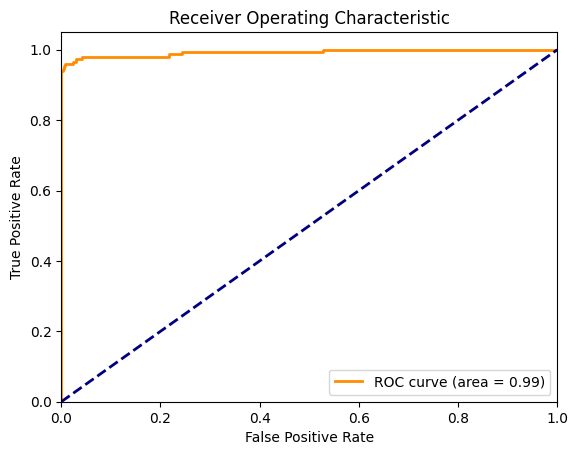

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import zipfile
import urllib.request

# دانلود و استخراج دیتاست
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
urllib.request.urlretrieve(url, 'smsspamcollection.zip')
with zipfile.ZipFile('smsspamcollection.zip', 'r') as zip_ref:
    zip_ref.extractall()

# بارگذاری دیتاست از فایل
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# پیش‌پردازش داده‌ها
# تبدیل برچسب‌ها به مقادیر عددی
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# استفاده از TF-IDF برای تبدیل متن به ویژگی‌ها
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

# تقسیم داده‌ها به داده‌های آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# آموزش مدل SVM با کرنل خطی
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# ارزیابی مدل و گزارش دقت
# پیش‌بینی داده‌های تست
y_pred = model.predict(X_test)

# محاسبه دقت
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# رسم نمودار ROC
# محاسبه نمرات احتمال برای داده‌های تست
y_prob = model.predict_proba(X_test)[:, 1]

# محاسبه مقادیر ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# رسم نمودار ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()